<a href="https://colab.research.google.com/github/brrikcy/machine-learning/blob/main/ML_EXP_11_Aglomerative_Clustering_Height%2CWeight_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

Importing Dataset

In [ ]:
#reading data
data=pd.read_csv('/content/drive/MyDrive/DATASETS/SOCR-HeightWeight.csv')
#Displaying Data
data

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971
...,...,...,...
24995,24996,69.50215,118.0312
24996,24997,64.54826,120.1932
24997,24998,64.69855,118.2655
24998,24999,67.52918,132.2682


Data Preprocessing

In [ ]:
#Dropping index column
data.drop(columns=['Index'],inplace=True)
#dropping rows
data=data[:100]

In [ ]:
#dropping rows with missing values
data.dropna(inplace=True)
#dropping rows with duplicate values
data.drop_duplicates(inplace=True)

<ipython-input-23-450a9451cdf5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
<ipython-input-23-450a9451cdf5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace=True)


In [ ]:
#performing standardization
scaler=StandardScaler()
std_data=scaler.fit_transform(data)

Plotting Dendogram

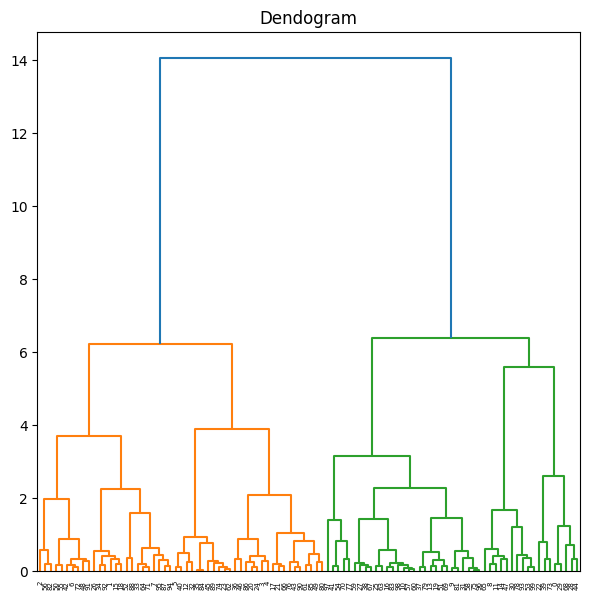

In [ ]:
#setting figure size
plt.figure(figsize=(7, 7))
#title of the plot
plt.title('Dendogram')
#plotting dendogram
Dendrogram = shc.dendrogram(shc.linkage(std_data, method='ward'))

Clustering

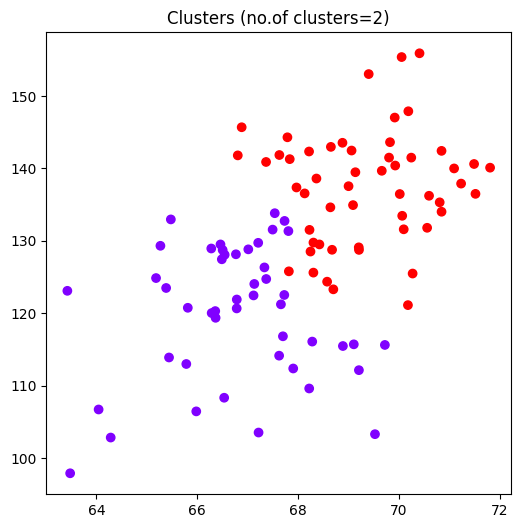

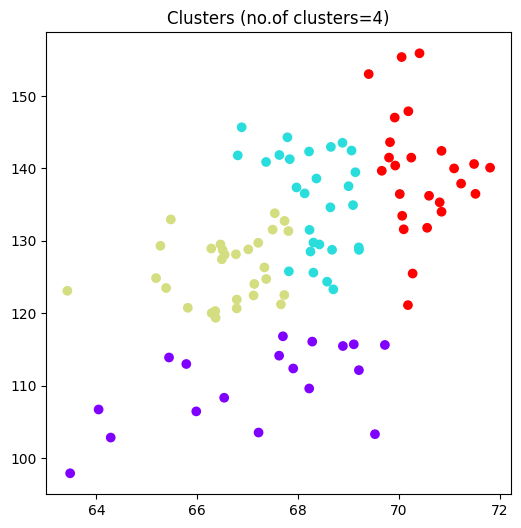

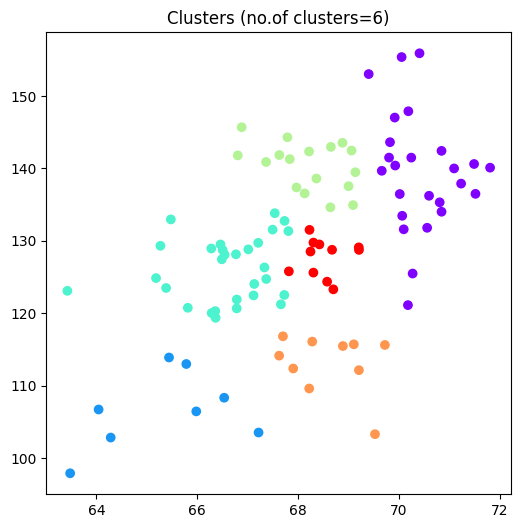

In [ ]:
#setting k values
k_values = [2, 4, 6]
#initializing list to store silhoette scores
silhouette_scores = []

for k in k_values:
    ac = AgglomerativeClustering(n_clusters=k)
    cluster_labels = ac.fit_predict(std_data)
    plt.figure(figsize=(6, 6))
    plt.scatter(data['Height(Inches)'], data['Weight(Pounds)'], c=cluster_labels, cmap='rainbow')
    plt.title(f'Clusters (no.of clusters={k})')
    plt.show()
    silhouette_scores.append(silhouette_score(data, cluster_labels))

Plotting Silhoette Scores

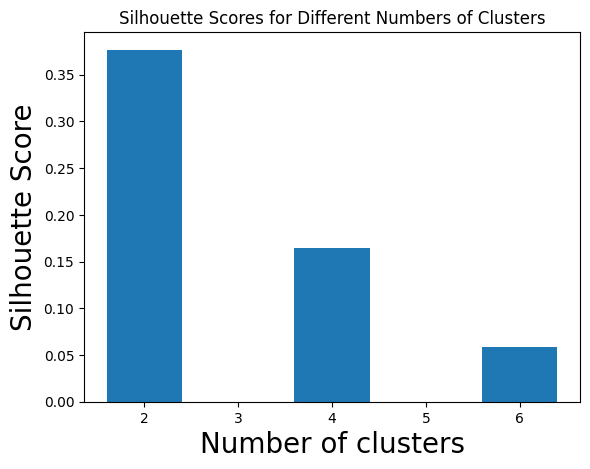

In [ ]:
plt.bar(k_values, silhouette_scores)
plt.xlabel('Number of clusters', fontsize=20)
plt.ylabel('Silhouette Score', fontsize=20)
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.show()